### 1. a. Eksplorasi Data

##### Menyiapkan beberapa library yang diperlukan

In [1]:
!pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import tensorflow 
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler

##### Menampilkan sekilas isi Facebook, Inc. stock data dari 'FB.csv' dan memeriksa null values

In [3]:
FB_Stock = pd.read_csv('FB.csv')
FB_Stock = FB_Stock.sort_values('Date')
FB_Stock['Date'] = pd.to_datetime(FB_Stock['Date'])
FB_Stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


In [4]:
FB_Stock.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Tidak ada record data yang null

##### Menampilkan sekilas isi International Business Machines Corporation stock data dari 'IBM.csv' dan memeriksa null values

In [5]:
IBM_Stock = pd.read_csv('IBM.csv')
IBM_Stock = IBM_Stock.sort_values('Date')
IBM_Stock['Date'] = pd.to_datetime(IBM_Stock['Date'])
IBM_Stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,7.713333,7.713333,7.626667,7.626667,0.618153,387200
1,1962-01-03,7.626667,7.693333,7.626667,7.693333,0.623556,288000
2,1962-01-04,7.693333,7.693333,7.613333,7.616667,0.617343,256000
3,1962-01-05,7.606667,7.606667,7.453333,7.466667,0.605185,363200
4,1962-01-08,7.460000,7.460000,7.266667,7.326667,0.593837,544000


In [6]:
IBM_Stock.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Tidak ada record data yang null

##### Menampilkan pergerakan harga stock kedua perusahan dengan Data Visualization

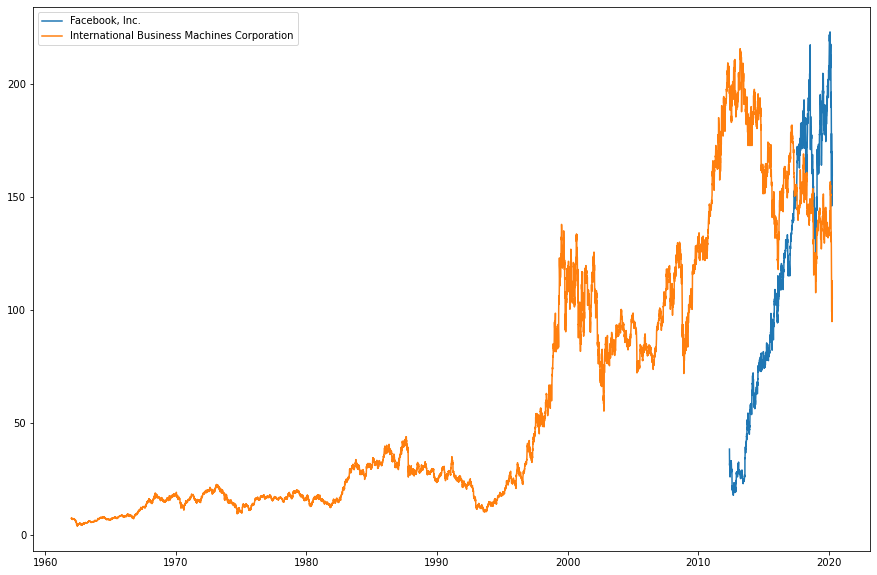

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15,10))
plt.plot(FB_Stock['Date'], FB_Stock['Close'], label='Facebook, Inc.')
plt.plot(IBM_Stock['Date'], IBM_Stock['Close'], label='International Business Machines Corporation')
plt.legend(loc='best')
plt.show()

Sejalan dengan tampilan sekilas terdapat perbedaan tanggal atau waktu mulainya data IBM_Stock yang tersedia sejak '1962-01-02' sedangkan FB_Stock tersedia sejak '2012-05-17'.

Dikarenakan kedua dataset akan dipaki secara bersamaan, maka kedua dataset harus disamakan rentang waktunya (timestamp).

Solusinya adalah men-drop sebagian record data IBM_Stock dalam rentang tertentu untuk disamakan dengan data FB_Stock 

##### Drop bagian IMB dari tahun 1962-01-02 sampai 2012-05-17

In [8]:
#IBM_Stock = IBM_Stock.drop(pd.date_range('1962-01-02', '2012-05-17'), errors='ignore')
IBM_Stock.drop(IBM_Stock.loc[(IBM_Stock['Date'] > '1962-01-01') & (IBM_Stock['Date'] < '2012-05-21')].index, inplace=True)
FB_Stock.drop(FB_Stock.loc[(FB_Stock['Date'] < '2012-05-21')].index, inplace=True)

Dibagian ini ditambahkan drop untuk dataset FB_Stock agar kedua dataset dimulai bersamaan pada tanggal 2012-05-21(senin). Sebagai langkah awal dari solusi kebutuhan observe day(senin-jumat) dan predict day(senin saja)

##### Memastikan drop records sudah benar

In [9]:
IBM_Stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
12684,2012-05-21,195.979996,197.929993,194.630005,197.759995,149.745026,3831700
12685,2012-05-22,198.039993,198.259995,196.059998,196.820007,149.033279,3567100
12686,2012-05-23,195.529999,196.490005,193.199997,196.119995,148.503204,4100000
12687,2012-05-24,195.990005,196.279999,194.000000,196.089996,148.480530,3569300
12688,2012-05-25,195.110001,196.000000,194.000000,194.300003,147.125122,2901900


In [10]:
FB_Stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
5,2012-05-25,32.900002,32.950001,31.110001,31.910000,31.910000,37149800


In [11]:
IBM_Stock.shape

(1979, 7)

In [12]:
FB_Stock.shape

(1979, 7)

##### Membentuk array yang menampung nama perusahan dan mendrop kolom selain 'Date'(indexing) dan 'Close'

In [13]:
companies = [FB_Stock, IBM_Stock]

for comapany in companies:
    comapany.set_index('Date', inplace=True)
    comapany.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)

##### Memvisualisasikan kembali pergerakan kedua saham perusahaan

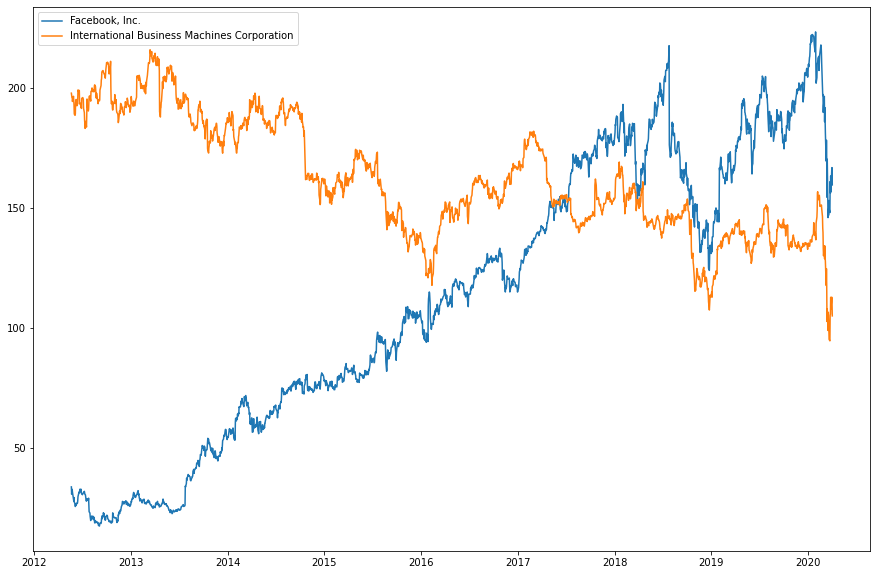

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15,10))
plt.plot(FB_Stock, label='Facebook, Inc.')
plt.plot(IBM_Stock, label='International Business Machines Corporation')
plt.legend(loc='best')
plt.show()

Dari grafik diatas terdapat tren menarik antar harga saham kedua perusahan. Harga saham terlihat menunjukan tren yang berkebalikan misalnya pada tahun 2012-2016 saham Facebook, Inc cenderung positif/meningkat sedangkan IBM cenderung turun. Kemudian pertengahan 2017, harga saham Facebook, Inc mengungguli IBM setelahnya.

##### Data Normalization

Menggunakan fungsi MinMaxScaler untuk menyamaratakan data dalam rentang 0-1. Melakukan penyesuaian dimensi data dengan reshape() untuk kedua perusahan. Lalu menggabungkan dalam 1 array berdasarkan kolom recordnya(axis=1).

In [15]:
scl = MinMaxScaler()
    
args = [company.values.reshape(company.shape[0],1) for company in companies]

In [16]:
array = scl.fit_transform(np.concatenate((args[0],args[1]), axis=1))

##### Memisahkan data time series menjadi dua bagian input dan output

Dengan window size = 5 (dari hari senin s.d jumat) dan horizon = 1 (hari senin saja)

'look_back' == 'windows' sebagai banyak hari observed atau sebagai input = 5 hari

'forward_days' sebagai banyak hari untuk dipredict yaitu senin (predict day) = 1 hari

'skip' sebagai banyak hari antar 'look_back' terakhir (jumat) dan 'forward_days' (senin) = 3 hari

Jadi dengan input sebanyak 5 hari ('look_back') kita akan memprediksi 1 hari ('forward_days') setelah berselang 3 hari ('skip') kemudian yaitu senin (predict day).

Pembagian Train-test-validation (80:10:10) set array

In [17]:
look_back= 5
forward_days = 1
skip = 3
num_companies= 2
jump = 7

last_train_index = round((80/100*len(array)))
last_test_index = last_train_index+round((10/100*len(array)))

array_train = array[:last_train_index]
array_test = array[last_train_index:last_test_index]
array_valid = array[last_test_index:]

In [18]:
len(array_train)

1583

In [19]:
len(array_test)

198

In [20]:
len(array_valid)

198

##### Membuat fungsi "processData"

Fungsi dari "processData" akan mengatur matrix input dan output untuk nantinya dilakukan predict/prediksi

Matrix akan disesuaikan berdasarkan parameter yang ada(data, look_back, skip, forward_days,num_companies,jump)

Fungsi berisikan loop/perulangan yang mengiterasi dari index 0 hingga index predict day akhir dengan jump = 7 (1 minggu) artinya data input yang digunakan dimulai senin dan akan terus diambil setiap senin. Dan nilai output hanya berisikan hari senin yang berjarak 3 hari ('skip') dari hari terakhir ('loop_back') yaitu jumat untuk masing-maisng perusahan.

In [21]:
def processData(data, look_back, skip, forward_days,num_companies,jump):
    X,Y = [],[]
    for i in range(0, len(data) -look_back - skip - forward_days +1, jump):
        X.append(data[i:(i+look_back)])
        Y.append(data[(i+look_back+skip) : (i+look_back+skip+forward_days) ])
    return np.array(X),np.array(Y)

##### Membagi train, test, dan validation set untuk setiap gelombang waktu(('look_back')+('skip')+('forward_days'))

In [22]:
X_test,y_test = processData(array_test,look_back,skip,forward_days,num_companies,jump)
y_test = np.array([list(a.ravel()) for a in y_test])

X_valid,y_valid = processData(array_valid,look_back,skip,forward_days,num_companies,jump)
y_valid = np.array([list(a.ravel()) for a in y_valid])

X_train,y_train = processData(array_train,look_back,skip,forward_days,num_companies,jump)
y_train = np.array([list(x.ravel()) for x in y_train])

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(225, 5, 2)
(28, 5, 2)
(28, 5, 2)
(225, 2)
(28, 2)
(28, 2)


### 1. b. Arsitektur Baseline

LSTM (units=50)

Layer akhir, node Perceptron (units=1)

Activation function untuk LSTM menggunakan ReLU

In [23]:
from keras.models import Sequential
from keras.layers import LSTM,Dense
from tensorflow.keras.activations import relu
from keras.models import load_model

model = Sequential()
model.add(LSTM(units=50, activation=relu, input_shape=(look_back,num_companies)))
model.add(Dense(units=1*num_companies))
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid),shuffle=True,batch_size=1, verbose=2)

Epoch 1/10
225/225 - 2s - loss: 0.0537 - val_loss: 0.0057 - 2s/epoch - 9ms/step
Epoch 2/10
225/225 - 1s - loss: 0.0014 - val_loss: 0.0061 - 620ms/epoch - 3ms/step
Epoch 3/10
225/225 - 1s - loss: 0.0014 - val_loss: 0.0043 - 545ms/epoch - 2ms/step
Epoch 4/10
225/225 - 1s - loss: 0.0014 - val_loss: 0.0051 - 620ms/epoch - 3ms/step
Epoch 5/10
225/225 - 1s - loss: 0.0017 - val_loss: 0.0048 - 702ms/epoch - 3ms/step
Epoch 6/10
225/225 - 1s - loss: 0.0014 - val_loss: 0.0049 - 570ms/epoch - 3ms/step
Epoch 7/10
225/225 - 1s - loss: 0.0013 - val_loss: 0.0042 - 708ms/epoch - 3ms/step
Epoch 8/10
225/225 - 1s - loss: 0.0014 - val_loss: 0.0051 - 883ms/epoch - 4ms/step
Epoch 9/10
225/225 - 1s - loss: 0.0015 - val_loss: 0.0041 - 525ms/epoch - 2ms/step
Epoch 10/10
225/225 - 1s - loss: 0.0013 - val_loss: 0.0054 - 607ms/epoch - 3ms/step


##### Menampilkan grafik perbandingan loss dan val_loss hasil train model baseline

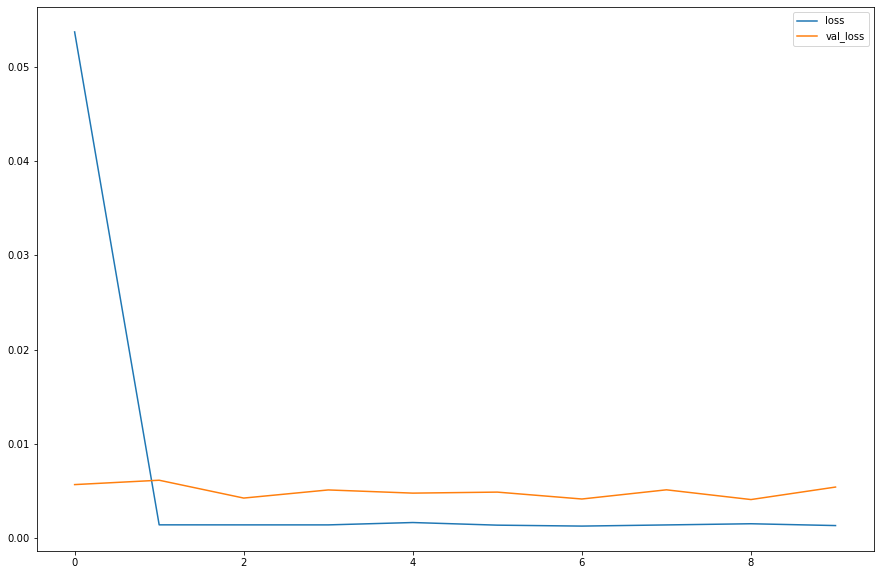

In [24]:
plt.figure(figsize = (15,10))

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc='best')
plt.show()

### 1. c. Arsitektur Modifikasi, model_01

##### === UNITS ===
##### Penggunaan LSTM dengan (units=60)
RMSE - Model 2: 0.05125869810127804
MAE - Model 2: 0.038540819816116276
##### Penggunaan LSTM dengan (units=50)
RMSE - Model 2: 0.04863259201984556
MAE - Model 2: 0.033258122964078804
##### Penggunaan LSTM dengan (units=40)
RMSE - Model 2: 0.04829049336694003
MAE - Model 2: 0.033980288127075764

Menunjukan jumlah neuron/units 40 lebih baik dari units 50 dan 60. Berdasarkan pencaharian paper[1] dikatakan tidak ada batasan atau formula tetentu dalam memilih jumlah units. Maka dari itu pemilihan jumlah neuron dilakukan acak diatas dan dibawah nilai 50. Hasilnya RMSE dan MAE unit = 40 lebih kecil yang artinya lebih baik dari unit lainnya.


##### === ACTIVATION FUNCTION ===
##### Penggunaan activation function 'softmax'
RMSE - Model 2: 0.0500645719270934
MAE - Model 2: 0.03517841826566576
##### Penggunaan activation function 'tanh'
RMSE - Model 2: 0.04857197549125593
MAE - Model 2: 0.0350291077638187
##### Penggunaan activation function 'relu'
RMSE - Model 2: 0.05150427416338347
MAE - Model 2: 0.035569687803433406

Menunjukan activation function 'relu' lebih baik dari 'softmax'. Selain melalui eksperimen diatas, berdasarkan referensi dari Essai Ali, dkk[2] arsitektur LSTM menggunakan gate activation function (sigmoid) dan state activation function (tanh) yang sering digunakan untuk neuron. Sehingga activation function 'relu' dan 'softmax' tidak lebih baik performanya dibandingkan dengan activation function 'tanh'.


##### === DROUPOUT ===
##### Penambahan droput
RMSE - Model 2: 0.04716202934728705
MAE - Model 2: 0.03222229548891176
##### Tanpa Dropout
RMSE - Model 2: 0.05038306984100266
MAE - Model 2: 0.03439869922679346

Sejalan dengan eksperimen iya atau tidaknya menambahkan droput diatas, berdasarkan paper[3] terbukti bahwa penambahan dropout layer menambah performa LSTM.


##### Reference:

[1] M. W. Putra Aldi, Jondri, and A. Aditsania, "Analisis dan Implementasi Long Short Term Memory Neural Network untuk Prediksi Harga Bitcoin,", vol.5, pp. 3548-3555, 2018.

[2] M. H. Essai Ali, A. B. Abdel-Raman and E. A. Badry, "Developing Novel Activation Functions Based Deep Learning LSTM for Classification," in IEEE Access, vol. 10, pp. 97259-97275, 2022, doi: 10.1109/ACCESS.2022.3205774.

[3] Z. He, "Improving LSTM Based Acoustic Model with Dropout Method," 2019 International Conference on Artificial Intelligence and Advanced Manufacturing (AIAM), Dublin, Ireland, 2019, pp. 27-30, doi: 10.1109/AIAM48774.2019.00012.

In [25]:
from keras.layers.core import Dense, Activation, Dropout

EPOCHS = 10

model_01 = Sequential()

model_01.add(LSTM(units=40, input_shape=(look_back,num_companies)))
model.add(Dropout(0.4))
model_01.add(Dense(units=1* num_companies))
model.add(Activation('tanh'))
model_01.compile(optimizer='adam', loss='mean_squared_error')

history_01 = model_01.fit(X_train,y_train,epochs=EPOCHS,validation_data=(X_valid,y_valid),shuffle=True,batch_size=1, verbose=2)

Epoch 1/10
225/225 - 4s - loss: 0.0301 - val_loss: 0.0043 - 4s/epoch - 18ms/step
Epoch 2/10
225/225 - 1s - loss: 0.0014 - val_loss: 0.0040 - 693ms/epoch - 3ms/step
Epoch 3/10
225/225 - 1s - loss: 0.0013 - val_loss: 0.0047 - 640ms/epoch - 3ms/step
Epoch 4/10
225/225 - 1s - loss: 0.0013 - val_loss: 0.0038 - 645ms/epoch - 3ms/step
Epoch 5/10
225/225 - 1s - loss: 0.0013 - val_loss: 0.0073 - 638ms/epoch - 3ms/step
Epoch 6/10
225/225 - 1s - loss: 0.0016 - val_loss: 0.0046 - 749ms/epoch - 3ms/step
Epoch 7/10
225/225 - 1s - loss: 0.0012 - val_loss: 0.0046 - 614ms/epoch - 3ms/step
Epoch 8/10
225/225 - 1s - loss: 0.0012 - val_loss: 0.0052 - 797ms/epoch - 4ms/step
Epoch 9/10
225/225 - 1s - loss: 0.0013 - val_loss: 0.0040 - 742ms/epoch - 3ms/step
Epoch 10/10
225/225 - 1s - loss: 0.0013 - val_loss: 0.0044 - 676ms/epoch - 3ms/step


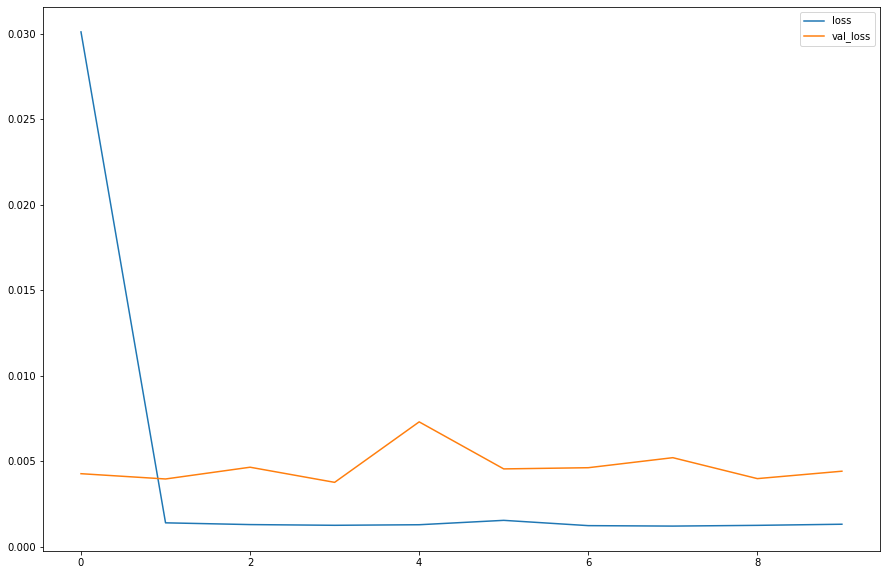

In [26]:
plt.figure(figsize = (15,10))

plt.plot(history_01.history['loss'], label='loss')
plt.plot(history_01.history['val_loss'], label='val_loss')
plt.legend(loc='best')
plt.show()

Dari grafik diatas terlihat pola yang hampir sama dengan model baseline

### 1. d. Evaluasi

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

X_valid,y_valid = processData(array_valid,look_back,skip,forward_days,num_companies,forward_days)
y_valid = np.array([list(a.ravel()) for a in y_valid])
y_true = y_valid
y_pred_model1 = model.predict(X_valid)
y_pred_model2 = model_01.predict(X_valid)

6/6 [==============================] - 1s 3ms/step


In [28]:
# Calculate RMSE
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate MAE
def calculate_mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

# Calculate MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Assuming you have the ground truth values y_true and predictions from two models y_pred_model1 and y_pred_model2
rmse_model1 = calculate_rmse(y_true, y_pred_model1)
rmse_model2 = calculate_rmse(y_true, y_pred_model2)

mae_model1 = calculate_mae(y_true, y_pred_model1)
mae_model2 = calculate_mae(y_true, y_pred_model2)

mape_model1 = calculate_mape(y_true, y_pred_model1)
mape_model2 = calculate_mape(y_true, y_pred_model2)

# Print the evaluation metrics
print("RMSE - Model 1:", rmse_model1)
print("RMSE - Model 2:", rmse_model2)
print("MAE - Model 1:", mae_model1)
print("MAE - Model 2:", mae_model2)
print("MAPE - Model 1:", mape_model1)
print("MAPE - Model 2:", mape_model2)

RMSE - Model 1: 0.123016585229249
RMSE - Model 2: 0.0596365051656696
MAE - Model 1: 0.099757178424427
MAE - Model 2: 0.04234463818441254
MAPE - Model 1: inf
MAPE - Model 2: inf


<ipython-input-28-c8868cac17ec>:11: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


Berdasarkan nilai RMSE, MAE yang masing-masing bernilai optimal apabila nilainya semakin kecil menunjukan model modifikasi telah berhasil meungguli model baseline setelah sebelumnya mengganti beberapa parameter seperti jumlah unit, activation function dan penambahan dropout.

Nilai MAPE kedua model inf atau tidak hingga, yang bisa jadi dikarenakan bilangan pembagi yang mendekati sangat kecil mendekati nol sehingga menjadi infinity hasilnya. Sesuai dengan permasalahan MAPE pada umumnya jika permbagi teralu kecil mendekati nol[1].

Reference:
S. Kim and H. Kim, "A new metric of absolute percentage error for intermittent demand forecasts," International Journal of Forecasting, Vol. 32, 2016, pp. 669-679, doi:10.1016.

### 1. e. Video Presentasi 
Link video presentasi: 
https://drive.google.com/file/d/1P5u1VxAeUjpvEvQf-_QSslku9_TauGp9/view?usp=sharing